In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# configures format of images
%config InlineBackend.figure_format = 'svg'
# allows render in Jupyter notebook
%matplotlib inline

sns.set(font_scale=0.8)

In [19]:
# read cleaned data into data frame

df = pd.read_csv('output_stage2.csv', parse_dates=['DATETIME'])
df.drop(['Unnamed: 0'], axis =1, inplace=True)
df['TOTAL'] = df['ENTRY_DIFF'] + df['EXIT_DIFF']
df.head(2)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,17.0,1.0,18.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,16.0,33.0,49.0


In [20]:
df.dtypes

C/A                   object
UNIT                  object
SCP                   object
STATION               object
LINENAME              object
DIVISION              object
DATE                  object
TIME                  object
DESC                  object
ENTRIES                int64
EXITS                  int64
DATETIME      datetime64[ns]
ENTRY_DIFF           float64
EXIT_DIFF            float64
TOTAL                float64
dtype: object

In [21]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.dtypes

C/A                   object
UNIT                  object
SCP                   object
STATION               object
LINENAME              object
DIVISION              object
DATE          datetime64[ns]
TIME                  object
DESC                  object
ENTRIES                int64
EXITS                  int64
DATETIME      datetime64[ns]
ENTRY_DIFF           float64
EXIT_DIFF            float64
TOTAL                float64
dtype: object

In [22]:
df = df.groupby(['STATION', 'DATE']).sum().reset_index()
df.head(10)

,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,1 AV,2018-04-28,15183306607,8122571450,15791.0,18077.0,33868.0
1,1 AV,2018-04-29,18220076225,9747209641,16931.0,19414.0,36345.0
2,1 AV,2018-04-30,18220178781,9747329628,21267.0,24012.0,45279.0
3,1 AV,2018-05-01,18139941256,9693792193,21741.0,23271.0,45012.0
4,1 AV,2018-05-02,18214473413,9747118933,22827.0,24790.0,47617.0
5,1 AV,2018-05-03,18220583831,9747768047,23446.0,24992.0,48438.0
6,1 AV,2018-05-04,18220725686,9747920558,23623.0,25625.0,49248.0
7,1 AV,2018-05-05,18220863790,9748068090,20341.0,22583.0,42924.0
8,1 AV,2018-05-06,18220978230,9748195204,16569.0,18101.0,34670.0
9,1 AV,2018-05-07,18221075434,9748307035,20593.0,22351.0,42944.0


In [23]:
# top stations
stations_list = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST', \
                 '14 ST-UNION SQ', 'TIMES SQ-42 ST', 'FULTON ST', '86 ST', \
                '42 ST-PORT AUTH', '59 ST COLUMBUS']#[:5]

In [24]:
stations_list

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 '14 ST-UNION SQ',
 'TIMES SQ-42 ST',
 'FULTON ST',
 '86 ST',
 '42 ST-PORT AUTH',
 '59 ST COLUMBUS']

In [25]:
# filters by checking to see if element in dataframe matches an element in stations list
df2 = df.loc[df['STATION'].isin(stations_list)].reset_index()

df2.head(6)

,index,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,1272,14 ST-UNION SQ,2018-04-28,3229543238,1287635022,64618.0,62879.0,127497.0
1,1273,14 ST-UNION SQ,2018-04-29,4290614206,1670913938,61415.0,53190.0,114605.0
2,1274,14 ST-UNION SQ,2018-04-30,4222796361,1662131735,99979.0,88515.0,188494.0
3,1275,14 ST-UNION SQ,2018-05-01,4230687629,1660962310,109976.0,93499.0,203475.0
4,1276,14 ST-UNION SQ,2018-05-02,4293884851,1677193974,114281.0,94972.0,209253.0
5,1277,14 ST-UNION SQ,2018-05-03,4299800085,1679230808,113323.0,93886.0,207209.0


In [26]:
df2['WEEK_OF_YEAR'] = df['DATE'].dt.week
df2.head(10)

,index,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL,WEEK_OF_YEAR
0,1272,14 ST-UNION SQ,2018-04-28,3229543238,1287635022,64618.0,62879.0,127497.0,17
1,1273,14 ST-UNION SQ,2018-04-29,4290614206,1670913938,61415.0,53190.0,114605.0,17
2,1274,14 ST-UNION SQ,2018-04-30,4222796361,1662131735,99979.0,88515.0,188494.0,18
3,1275,14 ST-UNION SQ,2018-05-01,4230687629,1660962310,109976.0,93499.0,203475.0,18
4,1276,14 ST-UNION SQ,2018-05-02,4293884851,1677193974,114281.0,94972.0,209253.0,18
5,1277,14 ST-UNION SQ,2018-05-03,4299800085,1679230808,113323.0,93886.0,207209.0,18
6,1278,14 ST-UNION SQ,2018-05-04,4232728868,1662648643,112131.0,94133.0,206264.0,18
7,1279,14 ST-UNION SQ,2018-05-05,4023342015,1555584209,84024.0,76211.0,160235.0,18
8,1280,14 ST-UNION SQ,2018-05-06,4301513984,1680636419,63079.0,56075.0,119154.0,18
9,1281,14 ST-UNION SQ,2018-05-07,4294929506,1666151245,101534.0,87690.0,189224.0,19


In [27]:
# create data frame for visualization
data = df2[['STATION','WEEK_OF_YEAR','TOTAL']].groupby(['STATION','WEEK_OF_YEAR'])[['TOTAL']].mean()
data = data.reset_index()
data['TOTAL']= data['TOTAL']/1000
data.head()

,STATION,WEEK_OF_YEAR,TOTAL
0,14 ST-UNION SQ,17,121.051000
1,14 ST-UNION SQ,18,184.869143
2,14 ST-UNION SQ,19,180.359429
3,14 ST-UNION SQ,20,180.497429
4,14 ST-UNION SQ,21,173.727857


In [28]:
# create a pivot table to pass into seaborn heatmap
df_data = pd.pivot_table(data=data,
                         index='STATION',
                         values='TOTAL',
                         columns='WEEK_OF_YEAR'
                        )
df_data.head()

WEEK_OF_YEAR,17,18,19,20,21,22,23,24,25,26,27,28,29,30
STATION,,,,,,,,,,,,,,
14 ST-UNION SQ,121.0510,184.869143,180.359429,180.497429,173.727857,169.005714,180.525286,179.455000,182.090143,168.973143,143.818857,172.221571,170.054000,189.8974
23 ST,90.7990,177.245429,170.917286,175.116429,159.706571,139.478571,164.245143,161.136571,167.106857,159.823714,120.822571,154.447857,160.978571,170.7288
34 ST-HERALD SQ,109.4230,195.142571,193.550000,184.508429,181.084429,164.138714,183.744000,192.155714,193.281571,189.227571,155.728286,183.398429,185.428571,224.6240
34 ST-PENN STA,137.7390,266.333143,269.062571,274.781000,263.821000,246.411143,269.367143,267.813714,272.837286,272.367714,223.485571,263.008714,264.517571,309.2970
42 ST-PORT AUTH,102.1595,148.009286,145.884429,149.790571,145.759429,137.954429,145.608714,143.974571,144.983714,145.339857,129.768571,145.162857,145.036857,164.1928


In [41]:
x_labels=['April','May','May','May','May', \
          'June','June','June','June','June',\
          'July','July','July','July']
df_data.columns = x_labels
df_data.head()


,April,May,May,May,May,June,June,June,June,June,July,July,July,July
STATION,,,,,,,,,,,,,,
14 ST-UNION SQ,121.0510,184.869143,180.359429,180.497429,173.727857,169.005714,180.525286,179.455000,182.090143,168.973143,143.818857,172.221571,170.054000,189.8974
23 ST,90.7990,177.245429,170.917286,175.116429,159.706571,139.478571,164.245143,161.136571,167.106857,159.823714,120.822571,154.447857,160.978571,170.7288
34 ST-HERALD SQ,109.4230,195.142571,193.550000,184.508429,181.084429,164.138714,183.744000,192.155714,193.281571,189.227571,155.728286,183.398429,185.428571,224.6240
34 ST-PENN STA,137.7390,266.333143,269.062571,274.781000,263.821000,246.411143,269.367143,267.813714,272.837286,272.367714,223.485571,263.008714,264.517571,309.2970
42 ST-PORT AUTH,102.1595,148.009286,145.884429,149.790571,145.759429,137.954429,145.608714,143.974571,144.983714,145.339857,129.768571,145.162857,145.036857,164.1928


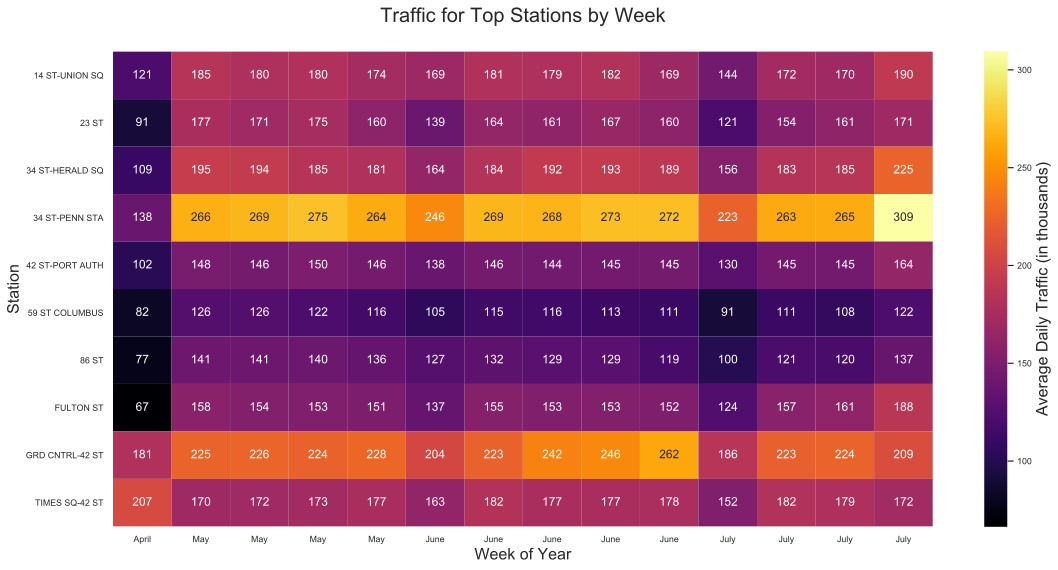

In [43]:
# create heatmap
plt.figure(figsize=(16,8))
ax = plt.axes()

sns.heatmap(df_data,
            fmt=".0f",
            cmap='inferno',
            annot=True,
            annot_kws={"size": 12},
            cbar_kws={'label': "Average Daily Traffic (in thousands)"},
            ax = ax
           )

ax.figure.axes[-1].yaxis.label.set_size(16)
ax.set_title('Traffic for Top Stations by Week', fontsize=20)
ax.title.set_position([.5, 1.05])
plt.xlabel('Week of Year', fontsize=16)
plt.ylabel('Station', fontsize=16);

# ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
# )

plt.tight_layout()

plt.savefig('heatmap_fig_final.pdf', transparent=True);